In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [16]:
df.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [17]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [18]:
#looking for missing values
df.isnull()
df.isnull().sum()

iso_code                              64
continent                            261
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        20978
new_tests                          21377
total_tests_per_thousand           20978
new_tests_per_thousand             21377
new_tests_smoothed                 20180
new_tests_smoothed_per_thousand    20180
tests_units                        19485
stringency_index                    5666
population                            64
population_density                  1341
median_age                          2983
aged_65_older                       3373
aged_70_older   

In [19]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
30216,NaN,NaN,International,2020-02-28,705.0,0.0,4.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30217,NaN,NaN,International,2020-02-29,705.0,0.0,6.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30218,NaN,NaN,International,2020-03-01,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30219,NaN,NaN,International,2020-03-02,705.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30220,NaN,NaN,International,2020-03-10,696.0,-9.0,7.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


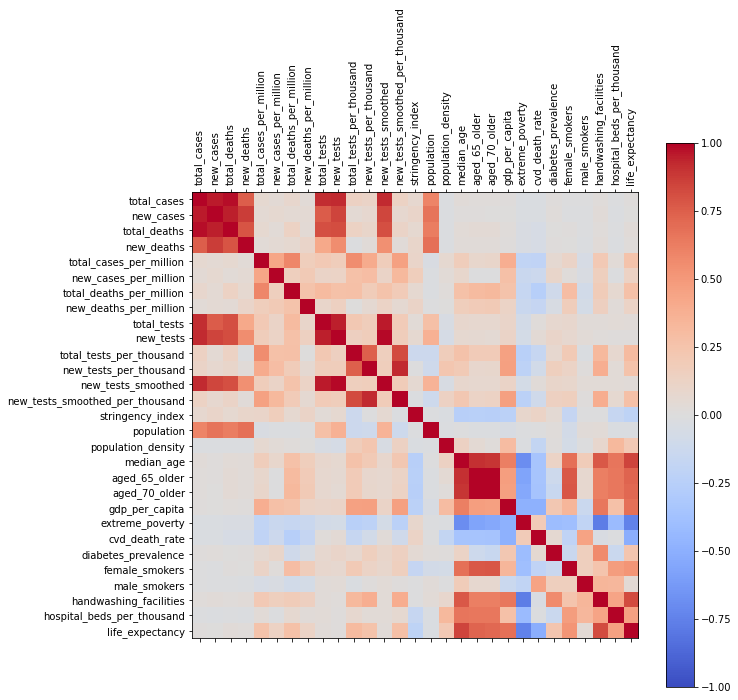

<Figure size 432x288 with 0 Axes>

In [13]:
corr = df.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()
# plt.savefig("owid_figures/correlation_matrix")

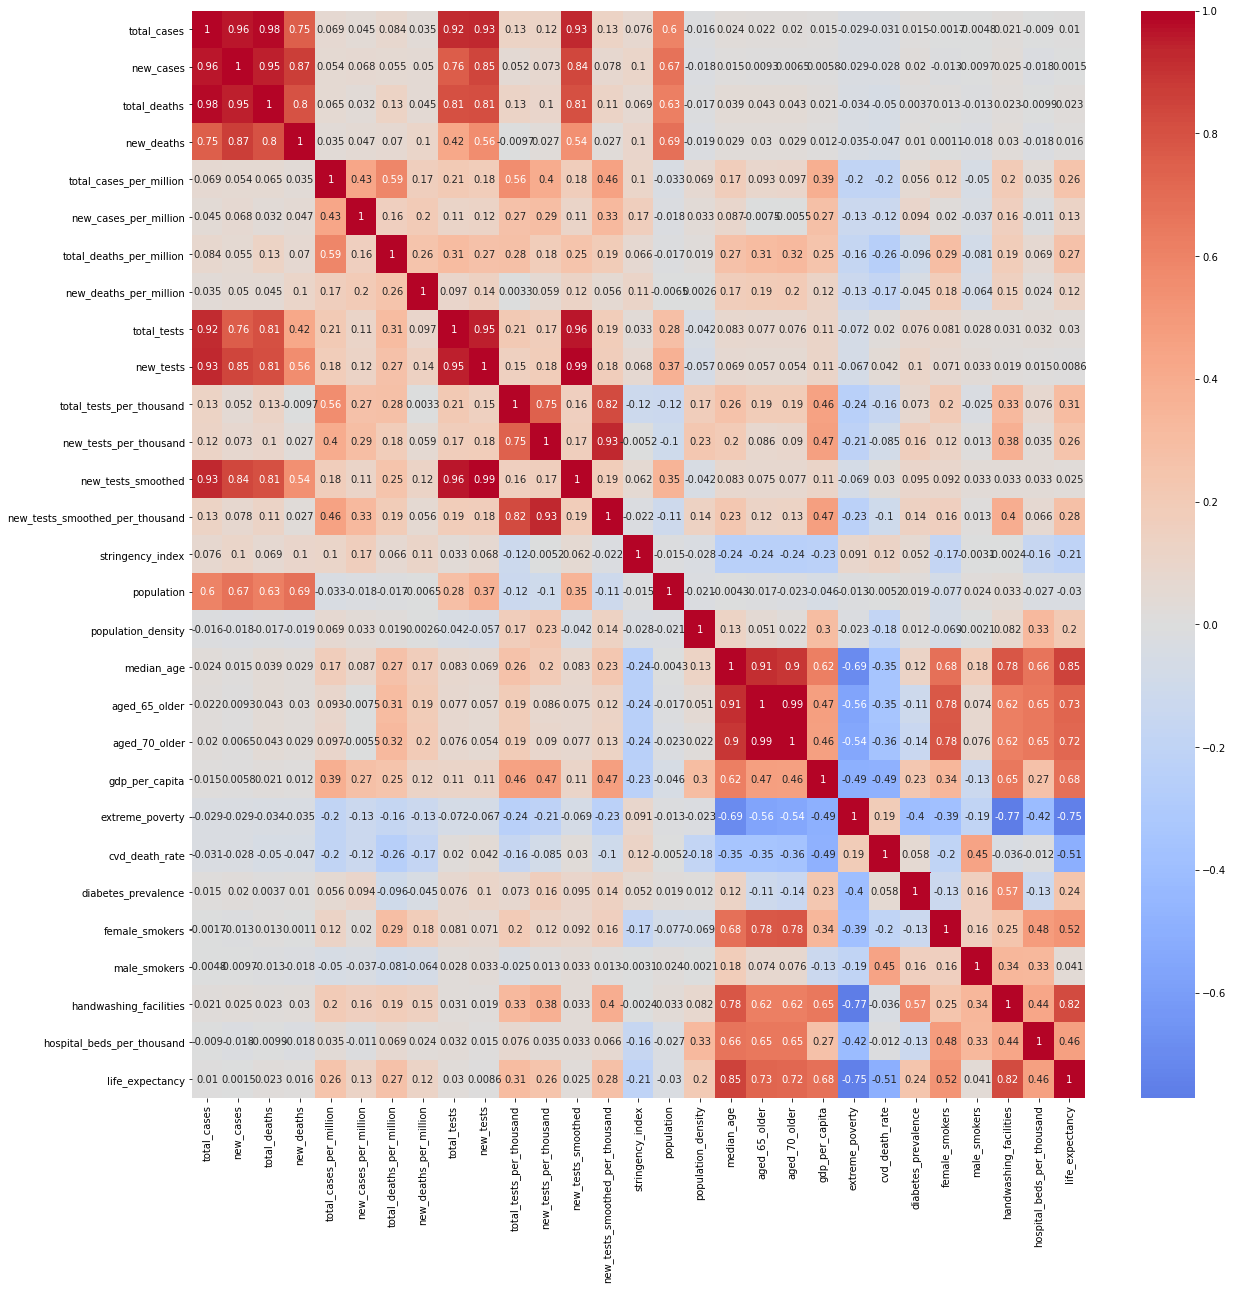

In [55]:
fig = plt.figure(figsize = [20,20])
sns.heatmap(df.corr(),annot = True, cmap = 'coolwarm', center = 0)
plt.show()

In [49]:
corr.head()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
total_cases,1.000000,0.843294,0.985135,0.348683,1.000000,0.843294,0.985135,0.348689,0.974173,0.975194,...,6.513941e-16,-1.113410e-15,1.113410e-15,-2.729651e-15,4.116141e-16,-1.314277e-15,2.729651e-15,NaN,-2.729651e-15,-4.116141e-16
new_cases,0.843294,1.000000,0.787240,0.589743,0.843294,1.000000,0.787240,0.589749,0.692329,0.706625,...,2.084266e-15,-1.023294e-15,1.023294e-15,-1.794433e-15,-3.932322e-16,-8.865698e-16,1.794433e-15,NaN,-1.794433e-15,3.932322e-16
total_deaths,0.985135,0.787240,1.000000,0.381594,0.985135,0.787239,1.000000,0.381599,0.922699,0.954058,...,1.184680e-15,-8.722576e-16,8.722576e-16,1.397470e-15,-1.415243e-15,3.214792e-16,-1.397470e-15,NaN,1.397470e-15,1.415243e-15
new_deaths,0.348683,0.589743,0.381594,1.000000,0.348683,0.589743,0.381594,1.000000,-0.149961,-0.019014,...,6.318910e-16,-3.088075e-16,3.088075e-16,7.306397e-16,1.420799e-16,-9.538136e-16,-7.306397e-16,NaN,7.306397e-16,-1.420799e-16
total_cases_per_million,1.000000,0.843294,0.985135,0.348683,1.000000,0.843294,0.985135,0.348689,0.974173,0.975194,...,2.673774e-16,2.399361e-16,-2.399361e-16,2.236501e-16,4.026577e-17,2.614357e-16,-2.236501e-16,NaN,2.236501e-16,-4.026577e-17


In [50]:
# df.location.unique()

In [35]:
df_usa = df[df.location == "United States"]

In [37]:
df_usa.head(10)

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
28558,USA,North America,United States,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28559,USA,North America,United States,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28560,USA,North America,United States,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28561,USA,North America,United States,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28562,USA,North America,United States,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28563,USA,North America,United States,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28564,USA,North America,United States,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28565,USA,North America,United States,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28566,USA,North America,United States,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86
28567,USA,North America,United States,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77,78.86


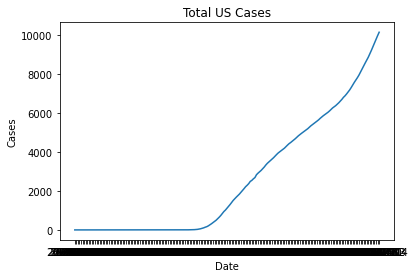

In [48]:
plt.figure()
plt.plot(df_usa.date, df_usa.total_cases_per_million)
plt.title("Total US Cases")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.show()